# Cápitulo 05 - Estudo de Caso 04

Engenharia de Atributos

In [115]:
# Importando bibliotecas:
from platform import python_version
print('Versão Python:', python_version(), '\n')

import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%reload_ext watermark
%watermark -a "gustavogzr" --iversions

Versão Python: 3.11.1 

Author: gustavogzr

numpy     : 1.25.2
scipy     : 1.11.1
seaborn   : 0.12.2
matplotlib: 3.7.2
pandas    : 2.0.3



In [116]:
## Configurando o estilo dos gráficos:
from matplotlib import rcParams # rcParams: dicionário de configurações padrão para matplotlib

rcParams['figure.figsize'] = 15, 8 # Configurando o tamanho padrão das figuras
rcParams['lines.linewidth'] = 3 # Configurando a espessura das linhas
rcParams['xtick.labelsize'] = 'x-large' # Configurando o tamanho dos labels no eixo x
rcParams['ytick.labelsize'] = 'x-large' # Configurando o tamanho dos labels no eixo y

## Carregando o dataset

In [117]:
df = pd.read_csv('.arquivos_DSA/dados/dataset.csv')
df.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [118]:
df.shape # Verificando o tamanho do dataset

(11000, 12)

In [119]:
df.info() # Verificando os tipos de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       11000 non-null  int64 
 1   corredor_armazem         11000 non-null  object
 2   modo_envio               11000 non-null  object
 3   numero_chamadas_cliente  11000 non-null  int64 
 4   avaliacao_cliente        11000 non-null  int64 
 5   custo_produto            11000 non-null  int64 
 6   compras_anteriores       11000 non-null  int64 
 7   prioridade_produto       11000 non-null  object
 8   genero                   11000 non-null  object
 9   desconto                 11000 non-null  int64 
 10  peso_gramas              11000 non-null  int64 
 11  entregue_no_prazo        11000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [120]:
nums = ['numero_chamadas_cliente',
        'avaliacao_cliente',
        'custo_produto',
        'compras_anteriores',
        'desconto',
        'peso_gramas']
df[nums].head()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
0,4,2,177,3,44,1233
1,4,5,216,2,59,3088
2,2,2,183,4,48,3374
3,3,3,176,4,10,1177
4,2,2,184,3,46,2484


In [121]:
cats = ['modo_envio',
        'prioridade_produto',
        'genero',
        'corredor_armazem']
df[cats].head()

,modo_envio,prioridade_produto,genero,corredor_armazem
0,Aviao,baixa,F,D
1,Aviao,baixa,M,F
2,Aviao,baixa,M,A
3,Aviao,media,M,B
4,Aviao,media,F,C


In [122]:
target = ['entregue_no_prazo']
df[target].head()

,entregue_no_prazo
0,1
1,1
2,1
3,1
4,1


In [123]:
df[nums].describe()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,4.054455,2.990455,210.200909,3.567727,13.372545,3633.844455
std,1.141438,1.413570,48.062985,1.522852,16.204943,1635.402722
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


In [124]:
df[cats].describe()

,modo_envio,prioridade_produto,genero,corredor_armazem
count,11000,11000,11000,11000
unique,3,3,2,5
top,Navio,baixa,F,F
freq,7463,5298,5546,3666


In [125]:
df[target].value_counts() # Verificando o balanceamento da variável target

entregue_no_prazo
1                    6563
0                    4437
Name: count, dtype: int64

## Limpeza de Dados

In [126]:
df.isna().sum() # Verificando a quantidade de valores nulos

ID                         0
corredor_armazem           0
modo_envio                 0
numero_chamadas_cliente    0
avaliacao_cliente          0
custo_produto              0
compras_anteriores         0
prioridade_produto         0
genero                     0
desconto                   0
peso_gramas                0
entregue_no_prazo          0
dtype: int64

## Tratamento de Valores Duplicados

In [127]:
df.duplicated().sum() # Verificando a quantidade de valores duplicados
# Verifica se tem linhas exatamente iguais

0

## Tratamento de Valores Outliers

In [128]:
print(f'Número de linhas antes do filtro de outliers: {df.shape[0]}')

Número de linhas antes do filtro de outliers: 11000


In [129]:
df[nums].head()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
0,4,2,177,3,44,1233
1,4,5,216,2,59,3088
2,2,2,183,4,48,3374
3,3,3,176,4,10,1177
4,2,2,184,3,46,2484


In [130]:
df['desconto'].mean() # Média da variável desconto

13.372545454545454

In [131]:
df['desconto'].std() # Desvio padrão da variável desconto

16.20494287359376

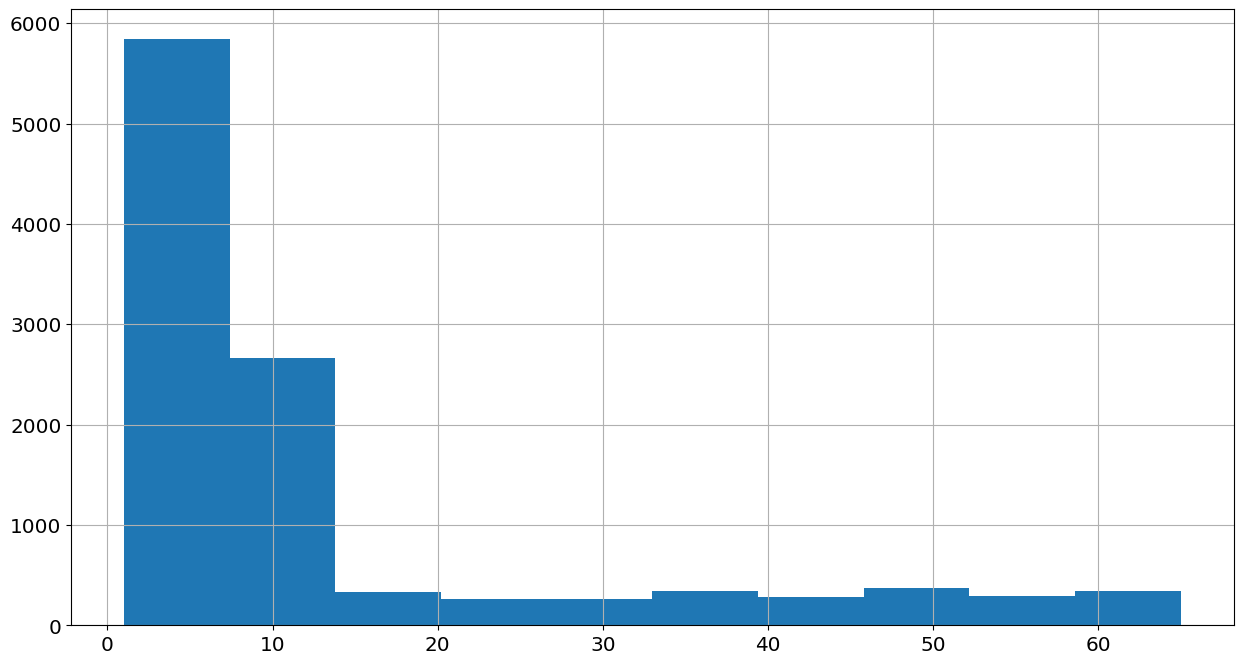

In [132]:
df['desconto'].hist() # Histograma da variável desconto
plt.show()

In [133]:
# Calcular os limites para identificação de outliers
limite_superior = df['desconto'].mean() + 3 * df['desconto'].std()
print(f'Limite superior para identificação de outliers: {limite_superior}') 
limite_inferior = df['desconto'].mean() - 3 * df['desconto'].std()
print(f'Limite inferior para identificação de outliers: {limite_inferior}')

Limite superior para identificação de outliers: 61.987374075326734
Limite inferior para identificação de outliers: -35.24228316623583


In [134]:
# Extrair os valores outliers de desconto:
df_outliers_desconto = df[(df['desconto'] <= limite_inferior) | (df['desconto'] >= limite_superior)]
df_outliers_desconto.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
36,37,D,Navio,3,5,137,4,alta,F,62,1477,1
60,61,D,Navio,3,1,221,3,baixa,F,64,2794,1
62,63,A,Navio,5,1,105,6,media,M,62,1292,1
111,112,B,Caminhao,4,2,239,3,baixa,F,65,3679,1
122,123,A,Caminhao,4,2,160,3,baixa,M,64,1714,1


In [135]:
# Filtrar o dataframe original para remover os outliers:
df = df[(df['desconto'] > limite_inferior) & (df['desconto'] < limite_superior)]
print(f'Número de linhas após o filtro de outliers da coluna \'desconto\': {df.shape[0]}')

Número de linhas após o filtro de outliers da coluna 'desconto': 10819


In [136]:
registros = np.array([True] * len(df)) # Array de booleanos
type(registros)

numpy.ndarray

In [137]:
np.count_nonzero(registros == True) # Contando quantos registros são True

10819

In [138]:
np.count_nonzero(registros == False) # Contando quantos registros são True

0

In [139]:
num2 = ['numero_chamadas_cliente', 'avaliacao_cliente', 'compras_anteriores',
        'custo_produto', 'peso_gramas'] # Lista de colunas numéricas sem a coluna desconto

In [140]:
for each_col in num2:
    zscore = np.abs(stats.zscore(df[each_col])) # Calculando o z-score absoluto
    registros = (zscore < 3) & registros # Atualizando o array de booleanos com os registros dentro do limite

In [141]:
np.count_nonzero(registros == True) # Contando quantos registros são True

10643

In [142]:
np.count_nonzero(registros == False) # Contando quantos registros são False

176

In [143]:
df = df[registros] # Filtrando o dataframe original com os registros dentro do limite

In [144]:
print(f'Número de linhas após o filtro de outliers: {df.shape[0]}')

Número de linhas após o filtro de outliers: 10643


## Tratamento de Desbalanceamento de Classe

In [145]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [146]:
df['entregue_no_prazo'].value_counts() # Verificando o balanceamento da variável target

entregue_no_prazo
1    6282
0    4361
Name: count, dtype: int64

Não há necessidade de balancear as classes, pois o dataset já está balanceado.

## Features Selection (decidir quais atributos usar no modelo)

In [147]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [148]:
df.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
4866,4867,D,Navio,4,3,158,5,media,F,7,4344,1
2092,2093,C,Navio,5,4,178,7,media,M,52,1824,1
739,740,F,Navio,3,2,241,3,baixa,M,22,3030,1
9545,9546,F,Navio,3,3,190,3,baixa,F,9,5279,0
2222,2223,A,Navio,3,4,234,3,media,F,37,2111,1


In [149]:
df_corr = df[['ID', 'numero_chamadas_cliente',
             'avaliacao_cliente', 'custo_produto', 
             'compras_anteriores', 'desconto', 'peso_gramas',
             'entregue_no_prazo']].corr() # Calculando a matriz de correlação
df_corr # Visualizando a matriz de correlação

,ID,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas,entregue_no_prazo
ID,1.000000,0.190104,-0.008010,0.197842,0.184451,-0.591557,0.263811,-0.403501
numero_chamadas_cliente,0.190104,1.000000,0.013398,0.328148,0.246604,-0.132172,-0.285186,-0.066327
avaliacao_cliente,-0.008010,0.013398,1.000000,0.006332,0.004893,0.000551,-0.004440,0.014809
custo_produto,0.197842,0.328148,0.006332,1.000000,0.163395,-0.137703,-0.146885,-0.071954
compras_anteriores,0.184451,0.246604,0.004893,0.163395,1.000000,-0.106093,-0.235066,-0.062599
desconto,-0.591557,-0.132172,0.000551,-0.137703,-0.106093,1.000000,-0.365062,0.388192
peso_gramas,0.263811,-0.285186,-0.004440,-0.146885,-0.235066,-0.365062,1.000000,-0.258815
entregue_no_prazo,-0.403501,-0.066327,0.014809,-0.071954,-0.062599,0.388192,-0.258815,1.000000


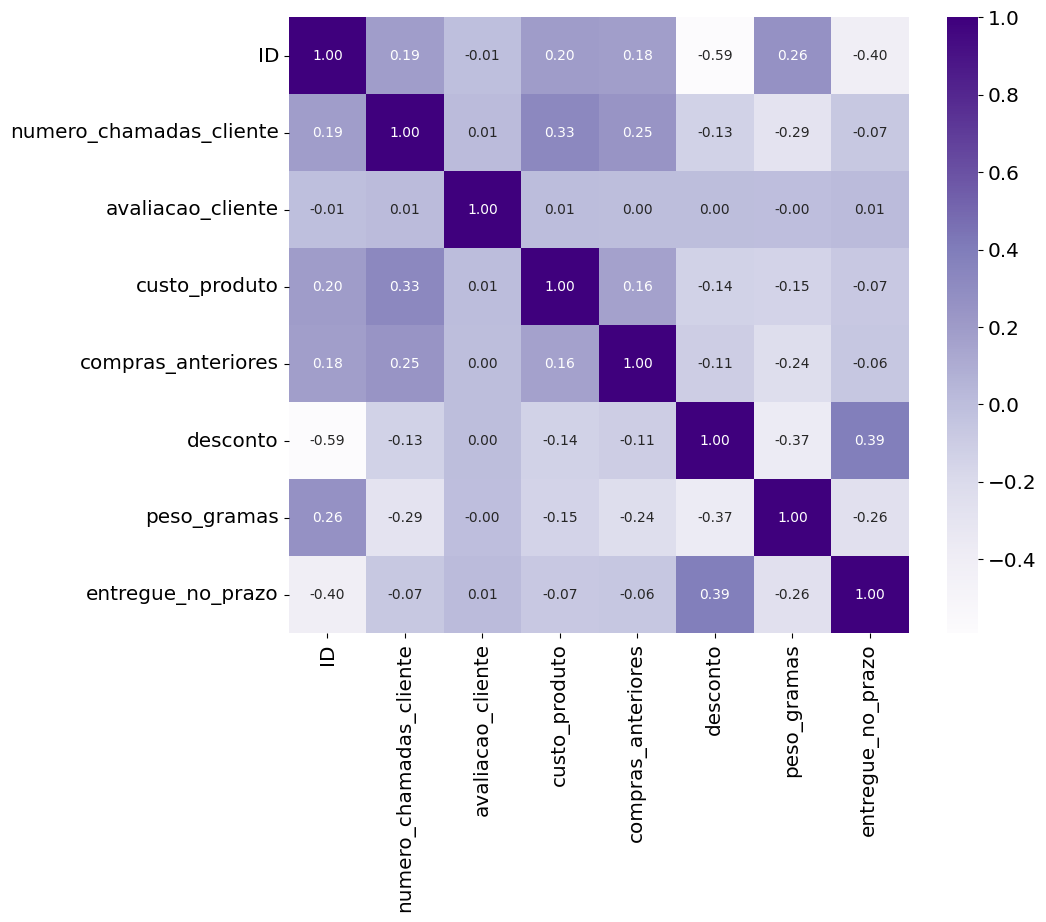

In [150]:
# Construir mapa de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, cmap='Purples', annot=True, fmt='.2f')
# cmap: mapa de cores, annot: exibir os valores, fmt: formato dos valores
plt.show()

Decisão: utilizar apenas os atributos numéricos que possuam correlação maior que 0,05 com a variável target. Desta forma, o atributo 'avaliacao_cliente' não será utilizado.

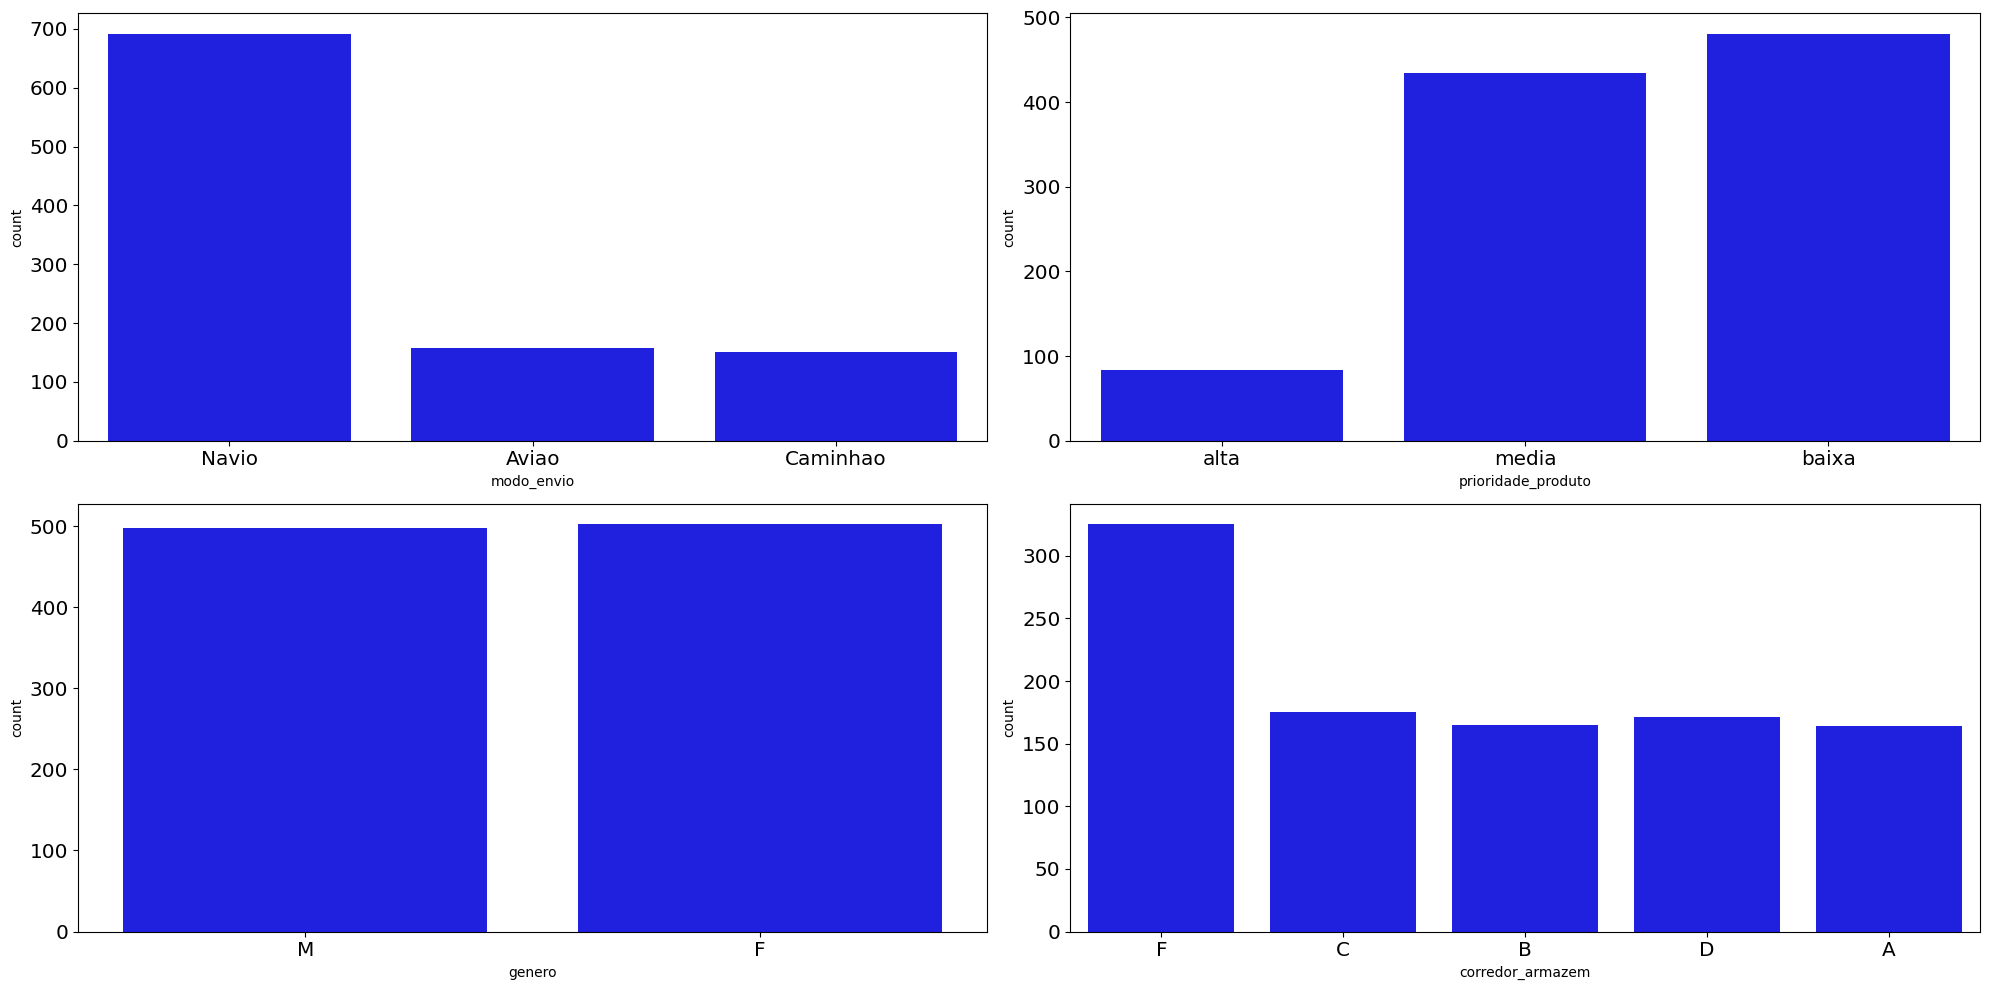

In [151]:
# Gráfico de barras para os atributos categóricos
df_sample = df.sample(1000, random_state=42) # Amostra aleatória de 1000 registros
plt.figure(figsize=(20, 10))
for i in range(0, len(cats)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df_sample[cats[i]], color='blue', orient='v')
    plt.tight_layout()
plt.show()

Não iremos utilizar a variável 'genero' pois ela não possui grande discrepância para a variável target entre as classes.

## Feature Extraction (criar novos atributos)

In [152]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [153]:
df.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [154]:
df_eng = df.copy() # Criando uma cópia do dataframe original

In [155]:
df_eng.shape # Verificando o tamanho do dataframe

(10643, 12)

In [156]:
df_eng.dtypes # Verificando os tipos de dados

ID                          int64
corredor_armazem           object
modo_envio                 object
numero_chamadas_cliente     int64
avaliacao_cliente           int64
custo_produto               int64
compras_anteriores          int64
prioridade_produto         object
genero                     object
desconto                    int64
peso_gramas                 int64
entregue_no_prazo           int64
dtype: object

### 1 - Performance de Envio do Produto por Prioridade do Produto

In [157]:
df_eng.prioridade_produto.value_counts() # Verificando a distribuição dos valores da coluna prioridade_produto

prioridade_produto
baixa    5174
media    4587
alta      882
Name: count, dtype: int64

In [158]:
df_eng['performance_prioridade_envio'] = np.nan # Criando uma nova coluna com valores nulos

In [159]:
df_eng['performance_prioridade_envio'] = np.where(
    (df_eng['prioridade_produto'] == 'alta') & 
    (df_eng['entregue_no_prazo'] == 0), 
    'Ruim', 'Excelente') # apenas para aprendizado. Solução definitiva está mais abaixo.

In [160]:
df_eng['performance_prioridade_envio'].value_counts() # Verificando a distribuição dos valores da nova coluna

performance_prioridade_envio
Excelente    10333
Ruim           310
Name: count, dtype: int64

In [161]:
df_eng['performance_prioridade_envio'] = np.nan # Limpando os dados

In [162]:
# Solução adequada:
df_eng['performance_prioridade_envio'] = np.where(
    (df_eng['prioridade_produto'] == 'alta') & (df_eng['entregue_no_prazo'] == 0), 'Atraso Crítico',
    np.where(
        (df_eng['prioridade_produto'] == 'media') & (df_eng['entregue_no_prazo'] == 0), 'Atraso Problemático',
        np.where(
            (df_eng['prioridade_produto'] == 'baixa') & (df_eng['entregue_no_prazo'] == 0), 'Atraso Tolerável',
            'Não Houve Atraso'
        ))) # Criando a nova coluna com base nas condições

In [163]:
df_eng['performance_prioridade_envio'].value_counts() # Verificando a distribuição dos valores da nova coluna

performance_prioridade_envio
Não Houve Atraso       6282
Atraso Tolerável       2134
Atraso Problemático    1917
Atraso Crítico          310
Name: count, dtype: int64

In [164]:
df_eng.sample(5) # Amostra aleatória de 5 registros

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio
6300,6301,D,Aviao,6,4,258,4,baixa,F,2,1051,1,Não Houve Atraso
1419,1420,B,Navio,4,5,161,2,media,M,55,1457,1,Não Houve Atraso
465,466,B,Navio,3,2,294,4,baixa,F,15,1318,1,Não Houve Atraso
6609,6610,B,Navio,5,1,267,5,media,M,10,1505,0,Atraso Problemático
10616,10617,A,Navio,4,2,253,3,media,F,7,5813,1,Não Houve Atraso


In [165]:
# Agrupar dados para análise
df_report1 = df_eng.groupby(['performance_prioridade_envio',
                             'entregue_no_prazo']).agg({'prioridade_produto': ['count']}).reset_index()
df_report1.head()

,performance_prioridade_envio,entregue_no_prazo,prioridade_produto
,,,count
0,Atraso Crítico,0,310
1,Atraso Problemático,0,1917
2,Atraso Tolerável,0,2134
3,Não Houve Atraso,1,6282


In [166]:
# Ajustando o nome das colunas
df_report1.columns = ['performance_prioridade_envio', 'entregue_no_prazo', 'contagem']
df_report1.head()

,performance_prioridade_envio,entregue_no_prazo,contagem
0,Atraso Crítico,0,310
1,Atraso Problemático,0,1917
2,Atraso Tolerável,0,2134
3,Não Houve Atraso,1,6282


In [167]:
# Realizar um pivot
df_report1 = pd.pivot_table(df_report1, 
                            values='contagem', 
                            index='performance_prioridade_envio',
                            columns='entregue_no_prazo').reset_index()
# values: valores a serem agregados, index: coluna para agrupamento, columns: coluna para pivot
df_report1.head()

entregue_no_prazo,performance_prioridade_envio,0,1
0,Atraso Crítico,310.0,NaN
1,Atraso Problemático,1917.0,NaN
2,Atraso Tolerável,2134.0,NaN
3,Não Houve Atraso,NaN,6282.0


In [168]:
# Renomear as colunas
df_report1.columns = ['Status do Envio', 'Total Atraso', 'Total no Prazo']
df_report1.head()

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso Crítico,310.0,NaN
1,Atraso Problemático,1917.0,NaN
2,Atraso Tolerável,2134.0,NaN
3,Não Houve Atraso,NaN,6282.0


In [169]:
# Substituir valores nulos por zero
df_report1['Total Atraso'] = df_report1['Total Atraso'].replace(np.nan, 0)
df_report1['Total no Prazo'] = df_report1['Total no Prazo'].fillna(0)
df_report1.head()

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso Crítico,310.0,0.0
1,Atraso Problemático,1917.0,0.0
2,Atraso Tolerável,2134.0,0.0
3,Não Houve Atraso,0.0,6282.0


In [170]:
df_report1['Total'] = df_report1['Total Atraso'] + df_report1['Total no Prazo']
df_report1.head()

,Status do Envio,Total Atraso,Total no Prazo,Total
0,Atraso Crítico,310.0,0.0,310.0
1,Atraso Problemático,1917.0,0.0,1917.0
2,Atraso Tolerável,2134.0,0.0,2134.0
3,Não Houve Atraso,0.0,6282.0,6282.0


In [171]:
# Remoção das colunas Total Atraso e Total no Prazo
df_report1.drop(['Total Atraso', 'Total no Prazo'], axis=1, inplace=True)
# axis: 0 para linha, 1 para coluna
df_report1.head()

,Status do Envio,Total
0,Atraso Crítico,310.0
1,Atraso Problemático,1917.0
2,Atraso Tolerável,2134.0
3,Não Houve Atraso,6282.0


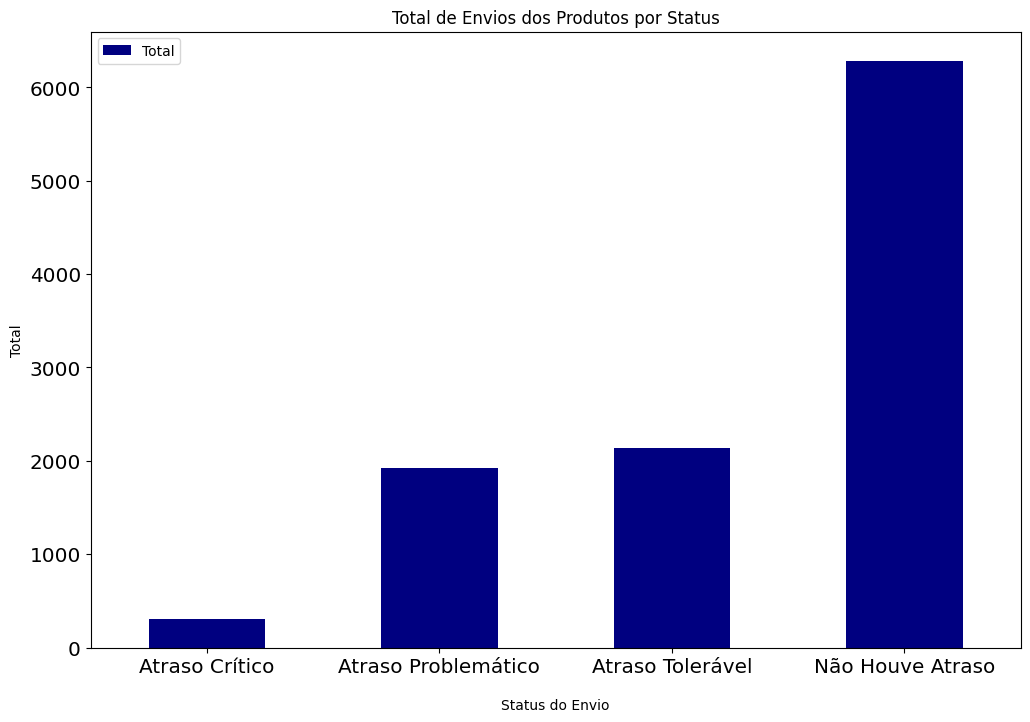

In [172]:
df_report1.set_index("Status do Envio").plot(kind='bar',
                                             title='Total de Envios dos Produtos por Status',
                                             ylabel='Total',
                                             xlabel='\nStatus do Envio',
                                             colormap='jet',
                                             figsize=(12, 8))
# set_index é necessário para que o gráfico seja plotado com a coluna Status do Envio no eixo x
plt.xticks(rotation=0)
plt.show()

### 2 - Performance de Envio do Produto por Prioridade de Envio e Modo de Envio

In [173]:
df_eng.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo', 'performance_prioridade_envio'],
      dtype='object')

In [174]:
df_eng.modo_envio.value_counts()

modo_envio
Navio       7212
Aviao       1728
Caminhao    1703
Name: count, dtype: int64

In [175]:
df_eng['performance_modo_envio'] = np.where(
    (df_eng['prioridade_produto'] == 'alta') & (df_eng['modo_envio'] == 'Navio') & (df_eng['entregue_no_prazo'] == 0), 'Atraso Crítico na Entrega por Navio',
    np.where(
    (df_eng['prioridade_produto'] == 'media') & (df_eng['modo_envio'] == 'Navio') & (df_eng['entregue_no_prazo'] == 0), 'Atraso Problemático na Entrega por Navio',
    np.where(
    (df_eng['prioridade_produto'] == 'baixa') & (df_eng['modo_envio'] == 'Navio') & (df_eng['entregue_no_prazo'] == 0), 'Atraso Tolerável na Entrega por Navio',
    np.where(
    (df_eng['prioridade_produto'] == 'alta') & (df_eng['modo_envio'] == 'Aviao') & (df_eng['entregue_no_prazo'] == 0), 'Atraso Crítico na Entrega por Avião',
    np.where(
    (df_eng['prioridade_produto'] == 'media') & (df_eng['modo_envio'] == 'Aviao') & (df_eng['entregue_no_prazo'] == 0), 'Atraso Problemático na Entrega por Avião',
    np.where(
    (df_eng['prioridade_produto'] == 'baixa') & (df_eng['modo_envio'] == 'Aviao') & (df_eng['entregue_no_prazo'] == 0), 'Atraso Tolerável na Entrega por Avião',
    np.where(
    (df_eng['prioridade_produto'] == 'alta') & (df_eng['modo_envio'] == 'Caminhao') & (df_eng['entregue_no_prazo'] == 0), 'Atraso Crítico na Entrega por Caminhão',
    np.where(
    (df_eng['prioridade_produto'] == 'media') & (df_eng['modo_envio'] == 'Caminhao') & (df_eng['entregue_no_prazo'] == 0), 'Atraso Problemático na Entrega por Caminhão',
    np.where(
    (df_eng['prioridade_produto'] == 'baixa') & (df_eng['modo_envio'] == 'Caminhao') & (df_eng['entregue_no_prazo'] == 0), 'Atraso Tolerável na Entrega por Caminhão',
    'Não Houve Atraso'
    ))))))))) # Criando a nova coluna com base nas condições

In [176]:
df_eng.performance_modo_envio.value_counts()

performance_modo_envio
Não Houve Atraso                               6282
Atraso Tolerável na Entrega por Navio          1453
Atraso Problemático na Entrega por Navio       1307
Atraso Tolerável na Entrega por Caminhão        350
Atraso Tolerável na Entrega por Avião           331
Atraso Problemático na Entrega por Caminhão     310
Atraso Problemático na Entrega por Avião        300
Atraso Crítico na Entrega por Navio             194
Atraso Crítico na Entrega por Avião              65
Atraso Crítico na Entrega por Caminhão           51
Name: count, dtype: int64

In [177]:
df_eng.sample(5) # Amostra aleatória de 5 registros

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio
1083,1084,B,Caminhao,3,1,227,3,media,F,47,3512,1,Não Houve Atraso,Não Houve Atraso
7117,7118,F,Caminhao,6,5,247,6,media,M,3,4832,0,Atraso Problemático,Atraso Problemático na Entrega por Caminhão
8387,8388,F,Navio,4,4,175,5,baixa,M,10,4498,1,Não Houve Atraso,Não Houve Atraso
4407,4408,B,Navio,3,5,107,5,baixa,F,4,5624,0,Atraso Tolerável,Atraso Tolerável na Entrega por Navio
9456,9457,D,Aviao,6,4,264,5,media,F,7,1220,1,Não Houve Atraso,Não Houve Atraso


In [178]:
# Agrupar dados para análise
df_report2 = df_eng.groupby(['performance_modo_envio',
                                'entregue_no_prazo']).agg({'prioridade_produto': ['count']}).reset_index()
df_report2

,performance_modo_envio,entregue_no_prazo,prioridade_produto
,,,count
0,Atraso Crítico na Entrega por Avião,0,65
1,Atraso Crítico na Entrega por Caminhão,0,51
2,Atraso Crítico na Entrega por Navio,0,194
3,Atraso Problemático na Entrega por Avião,0,300
4,Atraso Problemático na Entrega por Caminhão,0,310
5,Atraso Problemático na Entrega por Navio,0,1307
6,Atraso Tolerável na Entrega por Avião,0,331
7,Atraso Tolerável na Entrega por Caminhão,0,350
8,Atraso Tolerável na Entrega por Navio,0,1453


In [179]:
df_report2.columns = ['performance_modo_envio', 'entregue_no_prazo', 'contagem']
df_report2

,performance_modo_envio,entregue_no_prazo,contagem
0,Atraso Crítico na Entrega por Avião,0,65
1,Atraso Crítico na Entrega por Caminhão,0,51
2,Atraso Crítico na Entrega por Navio,0,194
3,Atraso Problemático na Entrega por Avião,0,300
4,Atraso Problemático na Entrega por Caminhão,0,310
5,Atraso Problemático na Entrega por Navio,0,1307
6,Atraso Tolerável na Entrega por Avião,0,331
7,Atraso Tolerável na Entrega por Caminhão,0,350
8,Atraso Tolerável na Entrega por Navio,0,1453
9,Não Houve Atraso,1,6282


In [180]:
df_report2.drop('entregue_no_prazo', axis=1, inplace=True)
df_report2

,performance_modo_envio,contagem
0,Atraso Crítico na Entrega por Avião,65
1,Atraso Crítico na Entrega por Caminhão,51
2,Atraso Crítico na Entrega por Navio,194
3,Atraso Problemático na Entrega por Avião,300
4,Atraso Problemático na Entrega por Caminhão,310
5,Atraso Problemático na Entrega por Navio,1307
6,Atraso Tolerável na Entrega por Avião,331
7,Atraso Tolerável na Entrega por Caminhão,350
8,Atraso Tolerável na Entrega por Navio,1453
9,Não Houve Atraso,6282


In [181]:
df_report2.columns = ['Status do Envio', 'Total']
df_report2

,Status do Envio,Total
0,Atraso Crítico na Entrega por Avião,65
1,Atraso Crítico na Entrega por Caminhão,51
2,Atraso Crítico na Entrega por Navio,194
3,Atraso Problemático na Entrega por Avião,300
4,Atraso Problemático na Entrega por Caminhão,310
5,Atraso Problemático na Entrega por Navio,1307
6,Atraso Tolerável na Entrega por Avião,331
7,Atraso Tolerável na Entrega por Caminhão,350
8,Atraso Tolerável na Entrega por Navio,1453
9,Não Houve Atraso,6282


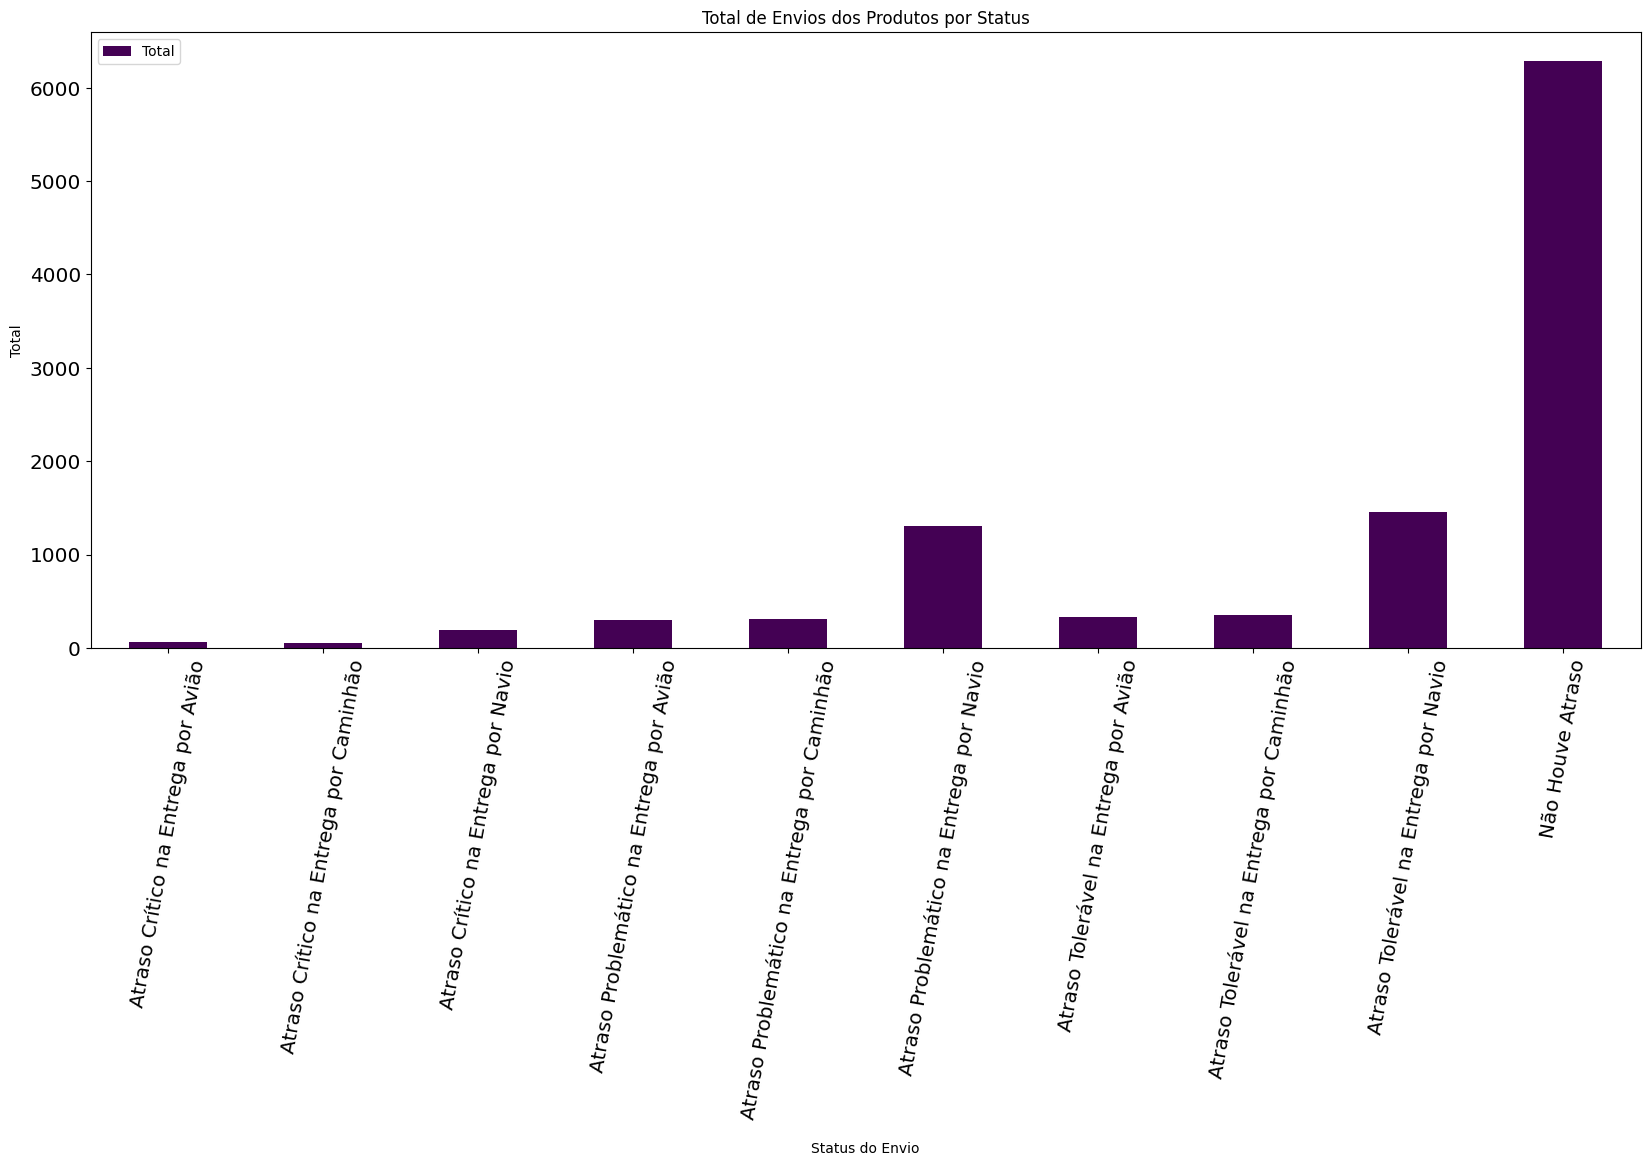

In [182]:
df_report2.set_index("Status do Envio").plot(kind='bar',
                                                title='Total de Envios dos Produtos por Status',
                                                ylabel='Total',
                                                xlabel='\nStatus do Envio',
                                                colormap='viridis',
                                                figsize=(20, 8))
plt.xticks(rotation=80)
plt.show()

### 3 - Performance de Envio do Produto considerando o Desconto

In [183]:
df.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
9799,9800,F,Navio,4,2,170,2,baixa,M,3,4299,0
2493,2494,B,Navio,4,5,151,3,alta,F,31,1365,1
10684,10685,C,Aviao,3,5,169,3,baixa,F,4,5659,0
5106,5107,D,Navio,6,1,145,3,media,F,1,4346,1
9954,9955,D,Navio,6,2,260,4,baixa,F,8,1522,0


In [184]:
df_eng.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo', 'performance_prioridade_envio',
       'performance_modo_envio'],
      dtype='object')

In [185]:
df_eng.desconto.describe()

count    10643.000000
mean        12.528047
std         14.991968
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         61.000000
Name: desconto, dtype: float64

In [186]:
media_desconto = df_eng['desconto'].mean()
df_eng['faixa_desconto'] = np.where(df_eng['desconto'] >= 12, 'Desconto Acima da Média', 'Desconto Abaixo da Média')

In [187]:
df_eng.faixa_desconto.value_counts()

faixa_desconto
Desconto Abaixo da Média    8269
Desconto Acima da Média     2374
Name: count, dtype: int64

In [188]:
df_eng['performance_faixa_desconto'] = np.where(
    (df_eng['faixa_desconto'] == 'Desconto Acima da Média') & (df_eng['entregue_no_prazo'] == 0), 'Atraso na Entrega com Desconto Acima da Média',
    np.where(
    (df_eng['faixa_desconto'] == 'Desconto Acima da Média') & (df_eng['entregue_no_prazo'] == 1), 'Entrega no Prazo com Desconto Acima da Média',
    np.where(
    (df_eng['faixa_desconto'] == 'Desconto Abaixo da Média') & (df_eng['entregue_no_prazo'] == 0), 'Atraso na Entrega com Desconto Abaixo da Média',
    'Entrega no Prazo com Desconto Abaixo da Média'
    ))) # Criando a nova coluna com base nas condições

In [189]:
df_eng.performance_faixa_desconto.value_counts()

performance_faixa_desconto
Atraso na Entrega com Desconto Abaixo da Média    4361
Entrega no Prazo com Desconto Abaixo da Média     3908
Entrega no Prazo com Desconto Acima da Média      2374
Name: count, dtype: int64

In [190]:
# Agrupar dados para análise
df_report3 = df_eng.groupby(['performance_faixa_desconto',
                             'entregue_no_prazo']).agg({'faixa_desconto': ['count']}).reset_index()
df_report3

,performance_faixa_desconto,entregue_no_prazo,faixa_desconto
,,,count
0,Atraso na Entrega com Desconto Abaixo da Média,0,4361
1,Entrega no Prazo com Desconto Abaixo da Média,1,3908
2,Entrega no Prazo com Desconto Acima da Média,1,2374


In [191]:
df_report3.drop('entregue_no_prazo', axis=1, inplace=True) # Removendo a coluna entregue_no_prazo
df_report3.columns = ['Status do Envio', 'Total'] # Renomeando as colunas
df_report3

,Status do Envio,Total
0,Atraso na Entrega com Desconto Abaixo da Média,4361
1,Entrega no Prazo com Desconto Abaixo da Média,3908
2,Entrega no Prazo com Desconto Acima da Média,2374


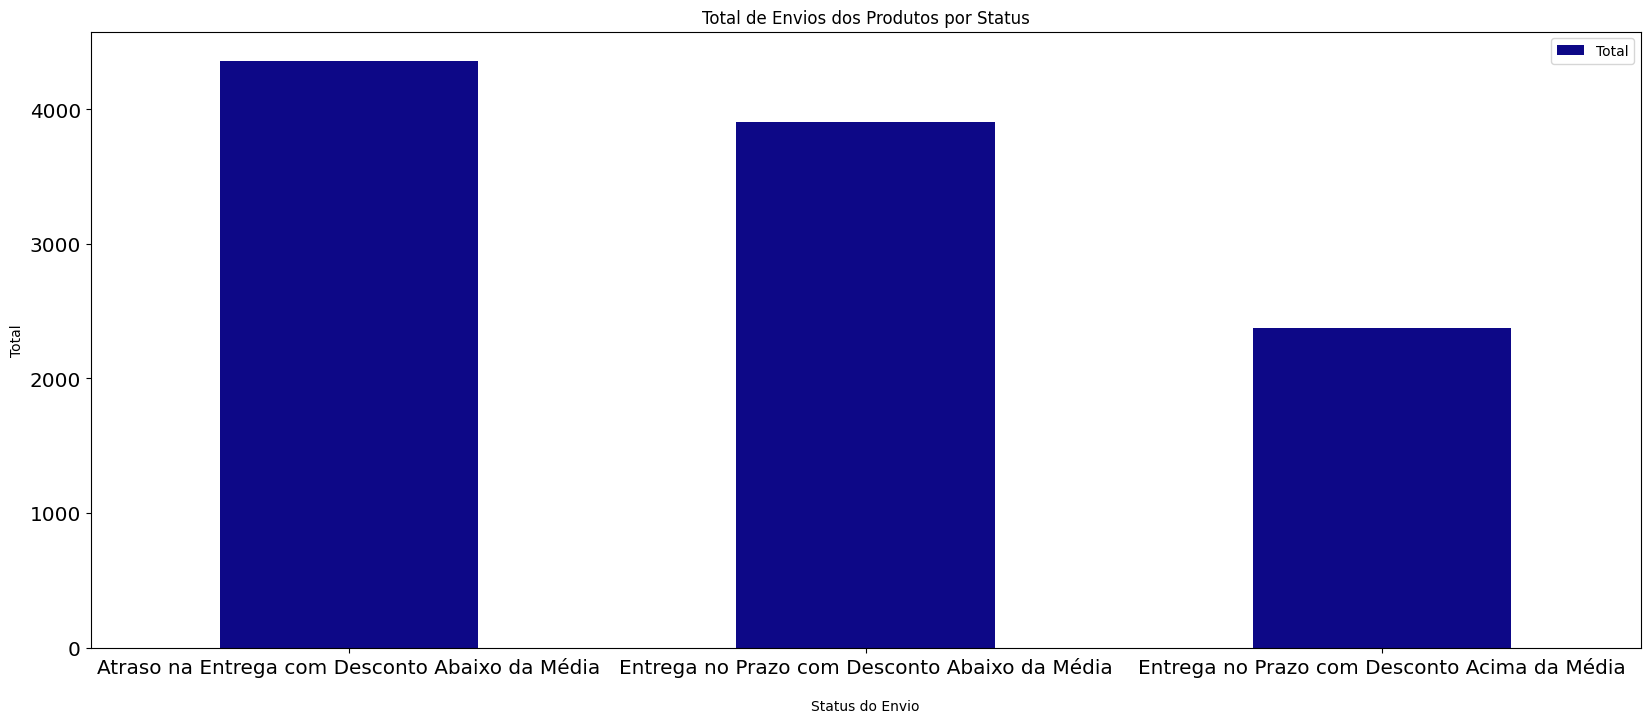

In [192]:
df_report3.set_index("Status do Envio").plot(kind='bar',
                                                title='Total de Envios dos Produtos por Status',
                                                ylabel='Total',
                                                xlabel='\nStatus do Envio',
                                                colormap='plasma',
                                                figsize=(20, 8))
plt.xticks(rotation=0)
plt.show()

In [193]:
df_eng.sample(7)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio,faixa_desconto,performance_faixa_desconto
5931,5932,B,Navio,2,5,189,5,baixa,M,3,5292,0,Atraso Tolerável,Atraso Tolerável na Entrega por Navio,Desconto Abaixo da Média,Atraso na Entrega com Desconto Abaixo da Média
5288,5289,A,Navio,2,3,110,5,baixa,M,3,4124,0,Atraso Tolerável,Atraso Tolerável na Entrega por Navio,Desconto Abaixo da Média,Atraso na Entrega com Desconto Abaixo da Média
8048,8049,A,Navio,7,3,245,4,media,F,10,1610,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Média,Entrega no Prazo com Desconto Abaixo da Média
5300,5301,A,Navio,4,4,134,2,media,F,5,5230,0,Atraso Problemático,Atraso Problemático na Entrega por Navio,Desconto Abaixo da Média,Atraso na Entrega com Desconto Abaixo da Média
5959,5960,F,Navio,3,4,133,8,media,F,10,5439,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Média,Entrega no Prazo com Desconto Abaixo da Média
7617,7618,B,Navio,5,1,256,4,media,F,5,4970,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Média,Entrega no Prazo com Desconto Abaixo da Média
8974,8975,C,Navio,5,2,203,2,media,F,2,4712,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Média,Entrega no Prazo com Desconto Abaixo da Média


In [194]:
# Salvar o dataset final
df_eng.to_csv('.arquivos_DSA/dados/df_eng.csv', sep=',', encoding='utf-8', index=False)